Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
390/390 [==============================] - 46s 89ms/step - loss: 4.1031 - accuracy: 0.1168 - val_loss: 4.5938 - val_accuracy: 0.0627
Epoch 2/50
390/390 [==============================] - 33s 85ms/step - loss: 3.2008 - accuracy: 0.2320 - val_loss: 2.9188 - val_accuracy: 0.2783
Epoch 3/50
390/390 [==============================] - 36s 91ms/step - loss: 2.7170 - accuracy: 0.3127 - val_loss: 2.3591 - val_accuracy: 0.3921
Epoch 4/50
390/390 [==============================] - 35s 89ms/step - loss: 2.4323 - accuracy: 0.3687 - val_loss: 2.3814 - val_accuracy: 0.3907
Epoch 5/50
390/390 [==============================] - 33s 84ms/step - loss: 2.2599 - accuracy: 0.4009 - val_loss: 2.2189 - val_accuracy: 0.4318
Epoch 6/50
390/390 [==============================] - 33s 85ms/step - loss: 2.1257 - accuracy: 0.4334 - val_loss: 2.0534 - val_accuracy: 0.4630
Epoch 7/50
390/390 [==============================] - 34s 87ms/step - loss: 2.0231 - accuracy: 0.4567 - val_loss: 2.0340 - val_accuracy:

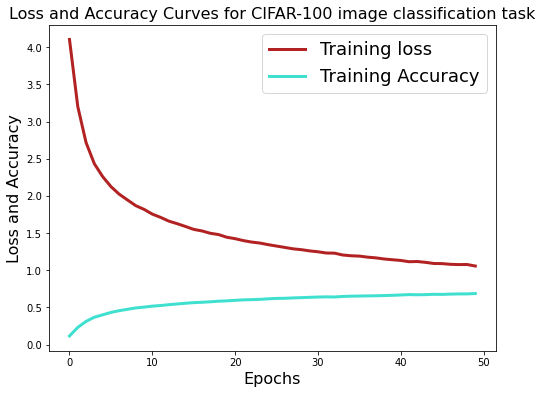

In [1]:
#importing the libraries
import numpy as np
import sklearn.metrics as metrics
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization,Dropout
from keras.datasets import cifar100
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# Define the model
model = Sequential()
# first convolutional layer
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model.add(BatchNormalization())
# second convolutional layer
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.25))
# third convolutional layer
model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu')) 
model.add(BatchNormalization())
# fourth convolutional layer
model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.25))
# fifth convolutional layer
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten()) 
#fully connected layer
model.add(Dense(512, activation='relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax')) 
# printing the model summary
model.summary()
# loading the cifar100 data
(cifarx_train, cifary_train), (cifarx_test, cifary_test) = cifar100.load_data()
# normalize the pixel values 
cifarx_train = cifarx_train.astype('float32') / 255
cifarx_test = cifarx_test.astype('float32') / 255
# convert the labels to one-hot encoded vectors
cifary_train = np_utils.to_categorical(cifary_train, 100)
cifary_test = np_utils.to_categorical(cifary_test, 100)
# define different learning rates for different convolutional layers
lr_schedule = {0: 0.01,1: 0.0002, 2: 0.001,3: 0.0005,4: 0.0001}
# define the adam optimizer
optimizer = Adam(lr=lr_schedule[0])
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])
# define data augmentation parameters
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1,horizontal_flip=True)
# Using Adam and set learning rate 0.001
optimizer = Adam(lr=0.001)  
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])
# train the model
history = model.fit(datagen.flow(cifarx_train,cifary_train, batch_size=128, shuffle=True), 
                    steps_per_epoch=len(cifarx_train)/128, epochs=50, validation_data=(cifarx_test, cifary_test))
# Evaluate the model
scores = model.evaluate(cifarx_test, cifary_test, verbose=0)
print("Test Accuracy: %.2f%%" % (scores[1]*100))

# Define plotchart function
def plotchart(history, value):
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'], 'firebrick', linewidth=3.0)
    plt.plot(history.history['accuracy'], 'turquoise', linewidth=3.0)
    plt.legend(['Training loss', 'Training Accuracy'], fontsize=18)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss and Accuracy', fontsize=16)
    plt.title('Loss and Accuracy Curves for {}'.format(value), fontsize=16)
    plt.show()

# Plot the training history
plotchart(history, 'CIFAR-100 image classification task')